In [2]:
from fastai.vision.all import *
from pathlib import Path

In [3]:
path = Path('C:/Users/alika/Desktop/Deep learning/Projects/coke-vs-pepsi-classifier/images/pepsi-cocacola-images')

In [5]:
((path/'train_images').ls())[1]

Path('C:/Users/alika/Desktop/Deep learning/Projects/coke-vs-pepsi-classifier/images/pepsi-cocacola-images/train_images/new_cola (10).jpg.jpg')

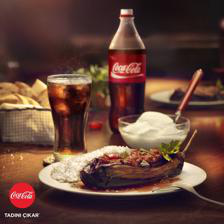

In [6]:
Image.open(((path/'train_images').ls())[10])

In [7]:
text = "new_cola (10).jpg"
re.findall(r'_(\w+)\s*\(', text)


['cola']

In [8]:

brands = ['cola', 'pepsi']
def get_brand_from_filename (image_name):
    image_name = image_name.name.lower()
    for brand in brands:
        if brand in image_name:
            return brand
        else:
            return 'unknown'

In [9]:
all_file = get_image_files(path/'train_images')
get_brand_from_filename(all_file[0])

'cola'

In [10]:
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    
    # فقط از پوشه train برای ساختن دیتاست استفاده می‌کنیم
    get_items=get_image_files, 
    
    # پوشه train را به صورت تصادفی به دو بخش آموزش و اعتبارسنجی تقسیم می‌کنیم
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    
    # برچسب را از نام فایل می‌گیریم
    get_y=using_attr(RegexLabeller(r'_(\w+)\s*\('), 'name'), 
    
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

data_block.summary(path/'train_images')

Setting-up type transforms pipelines
Found 470 items
2 datasets of sizes 376,94
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\alika\Desktop\Deep learning\Projects\coke-vs-pepsi-classifier\images\pepsi-cocacola-images\train_images\new_cola (99).jpg.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=224x224
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

    starting from
      C:\Users\alika\Desktop\Deep learning\Projects\coke-vs-pepsi-classifier\images\pepsi-cocacola-images\train_images\new_cola (99).jpg.jpg
    applying partial gives
      cola
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
 gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=224x224, TensorCategory(0))


Found 470 items
2 datasets of sizes 376,94
Setting up Pi

In [11]:
dls = data_block.dataloaders(path/'train_images')

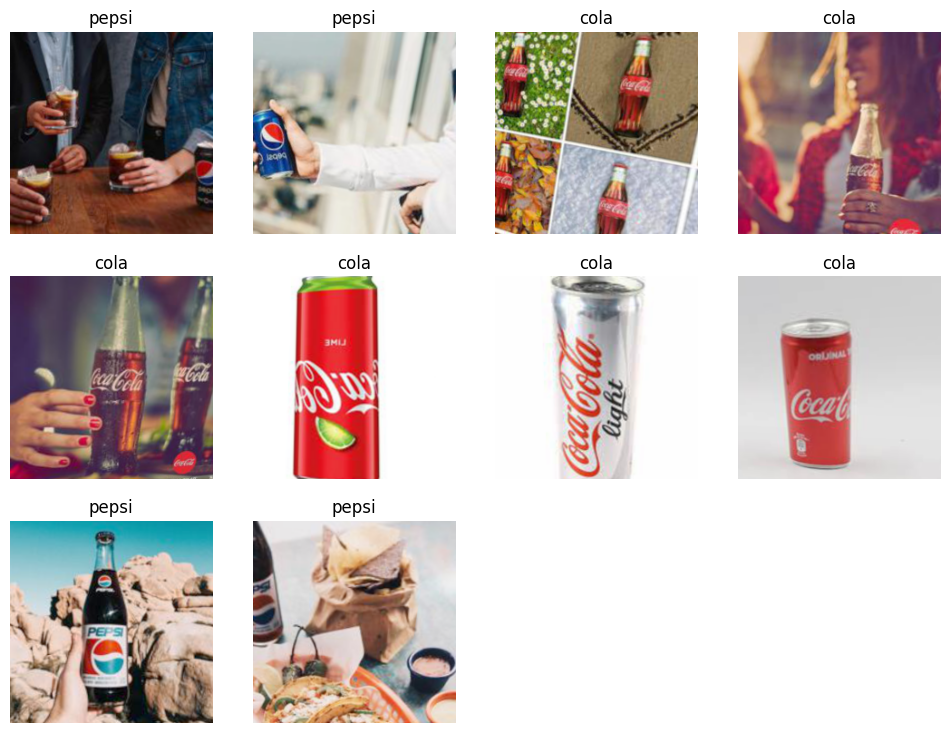

In [12]:
dls.show_batch(max_n = 10, nrows = 3)

Here, we used unique=True to have the same image repeated with different versions
of this RandomResizedCrop transform.

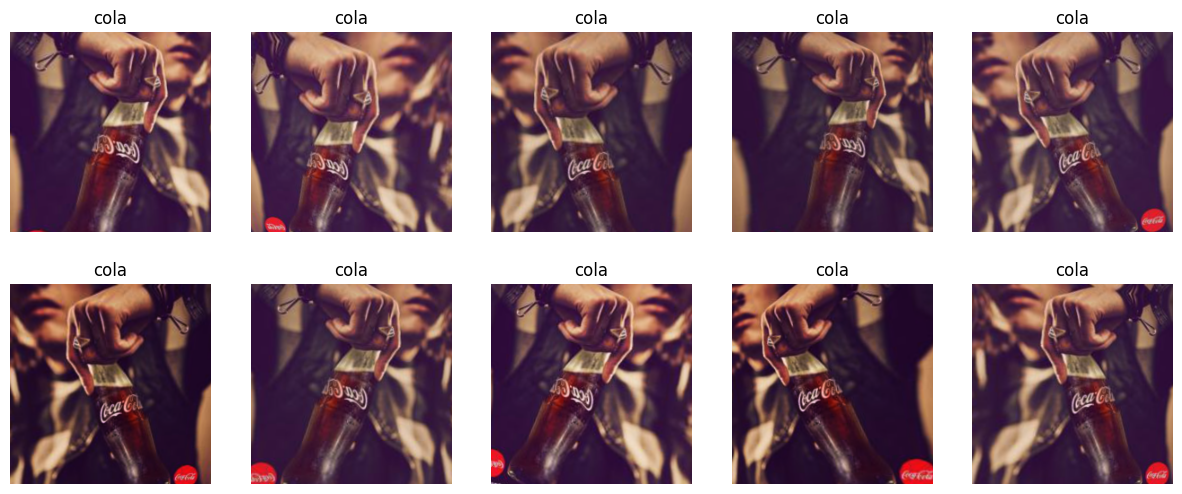

In [13]:
dls.train.show_batch(max_n = 10, nrows = 2, unique = True)

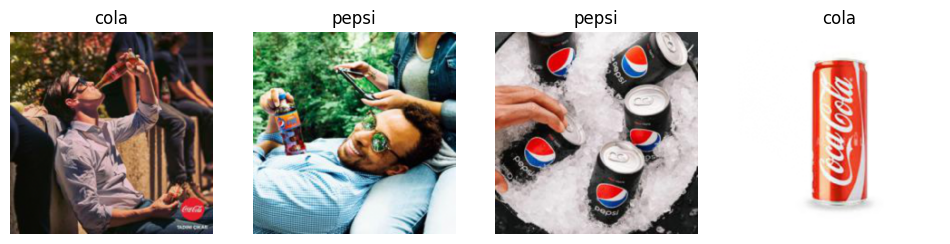

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

In [15]:
learner = vision_learner(dls , resnet34, metrics = error_rate)

In [16]:
x,y = dls.one_batch()

In [17]:
y

TensorCategory([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
                0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
                1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
                0])

In [18]:
preds = learner.get_preds(dl = [(x,y)])
preds[0]

tensor([[9.6471e-01, 3.5290e-02],
        [6.1479e-01, 3.8521e-01],
        [2.0211e-01, 7.9789e-01],
        [9.9765e-01, 2.3507e-03],
        [3.5361e-01, 6.4639e-01],
        [9.4012e-01, 5.9877e-02],
        [9.2972e-01, 7.0285e-02],
        [8.7885e-01, 1.2115e-01],
        [9.9487e-01, 5.1270e-03],
        [9.7640e-01, 2.3601e-02],
        [8.0444e-01, 1.9556e-01],
        [2.7966e-02, 9.7203e-01],
        [1.3392e-02, 9.8661e-01],
        [9.6097e-01, 3.9026e-02],
        [1.1567e-01, 8.8433e-01],
        [9.9381e-01, 6.1865e-03],
        [4.5911e-01, 5.4089e-01],
        [2.0627e-01, 7.9373e-01],
        [9.9936e-01, 6.3943e-04],
        [7.2816e-01, 2.7184e-01],
        [2.6787e-01, 7.3213e-01],
        [9.9992e-01, 8.2389e-05],
        [9.2497e-01, 7.5035e-02],
        [1.6315e-02, 9.8368e-01],
        [3.5042e-01, 6.4958e-01],
        [1.2922e-02, 9.8708e-01],
        [9.9870e-01, 1.3035e-03],
        [9.9978e-01, 2.1658e-04],
        [9.4976e-01, 5.0243e-02],
        [7.615

Improving Our Model

In [ ]:
print("fining best learning rate..")
suggested_lrs = learner.lr_find()

fining best learning rate..


In [ ]:
learner.fine_tune(4, base_lr= 2e-2)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.623475,3.148644,0.170213,01:16
1,0.430526,19.140245,0.468085,01:18
2,0.309061,1.290326,0.191489,01:17
3,0.247122,0.433347,0.053191,01:17
